<a href="https://colab.research.google.com/github/dphi-official/Datathons/blob/master/Top_Notebook_Submissions/Data_Sprint/Data_Sprint_4/Rank_3_Shantanil_Bagchi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Data Sprint 4](https://dphi.tech/practice/challenge/28) (Compressive Strength of Concrete)

#### **Prepared by - Shantanil Bagchi**

### Objective
The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate. Your objective is to build a machine learning model that would help Civil Engineers to estimate the compressive strength of the concrete and they can further take a decision whether the concrete should be used in their current project or not.


### Attribute information
- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa(megapascals) -- Output Variable

<hr><hr>

### Importing the necessary libraries for EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from scipy import stats
%matplotlib inline
pp = pprint.PrettyPrinter(indent=4)

### Load the Dataset

In [ ]:
data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv" )

### Data-first few rows

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


### Changing Column Names for Easy Access

In [ ]:
data.columns=['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age',
       'Concrete_compressive_strength']

### Data Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         772 non-null    float64
 1   Blast_Furnace_Slag             772 non-null    float64
 2   Fly_Ash                        772 non-null    float64
 3   Water                          772 non-null    float64
 4   Superplasticizer               772 non-null    float64
 5   Coarse_Aggregate               772 non-null    float64
 6   Fine_Aggregate                 772 non-null    float64
 7   Age                            772 non-null    int64  
 8   Concrete_compressive_strength  772 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.4 KB


### Missing Values

In [ ]:
print (data.isnull().sum())

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64


### Creating Interaction Term

In [ ]:
data['Water_Cement_ratio']=data['Water']/data['Cement']
#data['Water_Binder_ratio']=data['Water']/(data['Cement']+data['Blast_Furnace_Slag']+data['Fly_Ash'])

### Data Summary

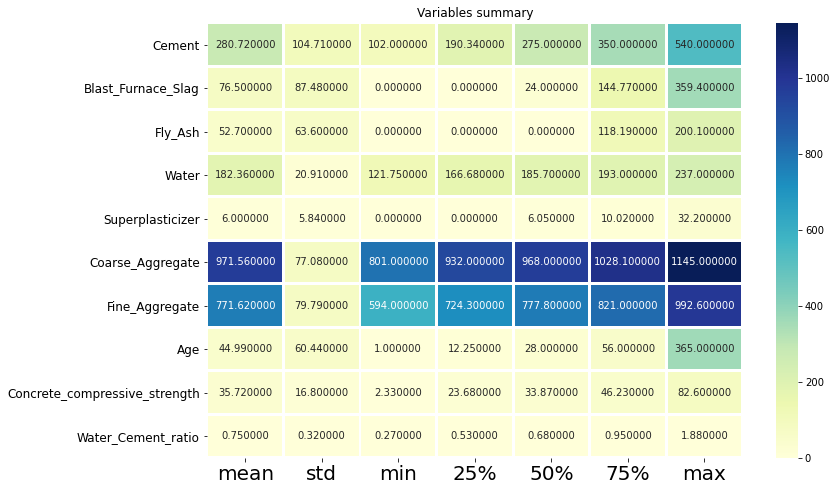

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f",cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

### Histogram of the complete dataset

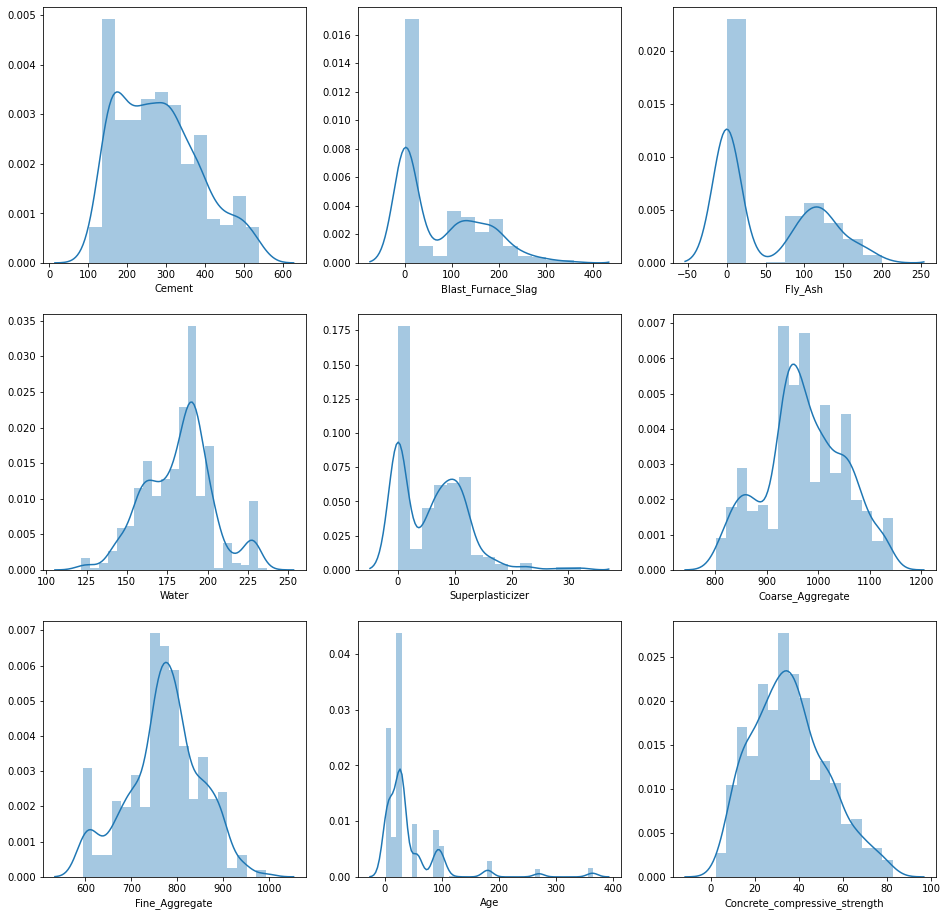

In [ ]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(data['Cement'],ax=ax2[0][0])
sns.distplot(data['Blast_Furnace_Slag'],ax=ax2[0][1])
sns.distplot(data['Fly_Ash'],ax=ax2[0][2])
sns.distplot(data['Water'],ax=ax2[1][0])
sns.distplot(data['Superplasticizer'],ax=ax2[1][1])
sns.distplot(data['Coarse_Aggregate'],ax=ax2[1][2])
sns.distplot(data['Fine_Aggregate'],ax=ax2[2][0])
sns.distplot(data['Age'],ax=ax2[2][1])
sns.distplot(data['Concrete_compressive_strength'],ax=ax2[2][2])

### **Key Insights**
- cement is almost normal.
- slag has two/three gausssians and rightly skewed.
- ash has two gaussians and rightly skewed.
- water has three guassians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three guassians and almost normal.
- fineagg has almost two guassians and looks like normal.
- age has multiple guassians and rightly skewed.

### Skewness Degree

In [ ]:
from scipy.stats import skew
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[np.object]).columns
skew_values = skew(data[numerical_features], nan_policy = 'omit')
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
7,Age,3.241385
4,Superplasticizer,0.928785
9,Water_Cement_ratio,0.926699
1,Blast_Furnace_Slag,0.761623
2,Fly_Ash,0.567073
0,Cement,0.502577
8,Concrete_compressive_strength,0.423727
3,Water,-0.011328
5,Coarse_Aggregate,-0.047778
6,Fine_Aggregate,-0.229588


In [ ]:
data.groupby("Age").mean()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Concrete_compressive_strength,Water_Cement_ratio
Age,,,,,,,,,
1,442.500000,0.000000,0.000000,193.000000,0.000000,1045.500000,688.000000,9.452716,0.441558
3,289.870833,62.616250,56.353438,177.159792,6.427781,975.625104,795.776979,18.572608,0.711862
7,305.248421,95.316842,11.084211,184.521053,2.906737,983.737895,770.676842,24.776786,0.698620
14,254.645882,17.684902,94.092941,175.267843,6.548569,1021.122157,797.314314,29.379519,0.739179
28,263.118476,91.836381,60.614127,184.016444,6.793387,953.408032,761.004540,36.483745,0.820327
56,300.667971,59.581159,83.109855,167.326667,9.948362,974.894493,799.110725,52.997665,0.628487
90,282.437209,91.281395,0.000000,202.209302,0.000000,960.948837,754.009302,40.052912,0.848302
91,398.364706,145.876471,0.000000,157.288235,15.723529,927.705882,790.976471,69.780244,0.404469
100,219.536750,25.976750,114.893500,170.550750,7.795425,1024.464750,806.227000,47.436466,0.802711


In [ ]:
data.Age.value_counts()

28     315
3       96
7       95
56      69
14      51
90      43
100     40
180     21
91      17
270     10
365      9
360      3
1        2
120      1
Name: Age, dtype: int64

### Visualise the interactions between terms

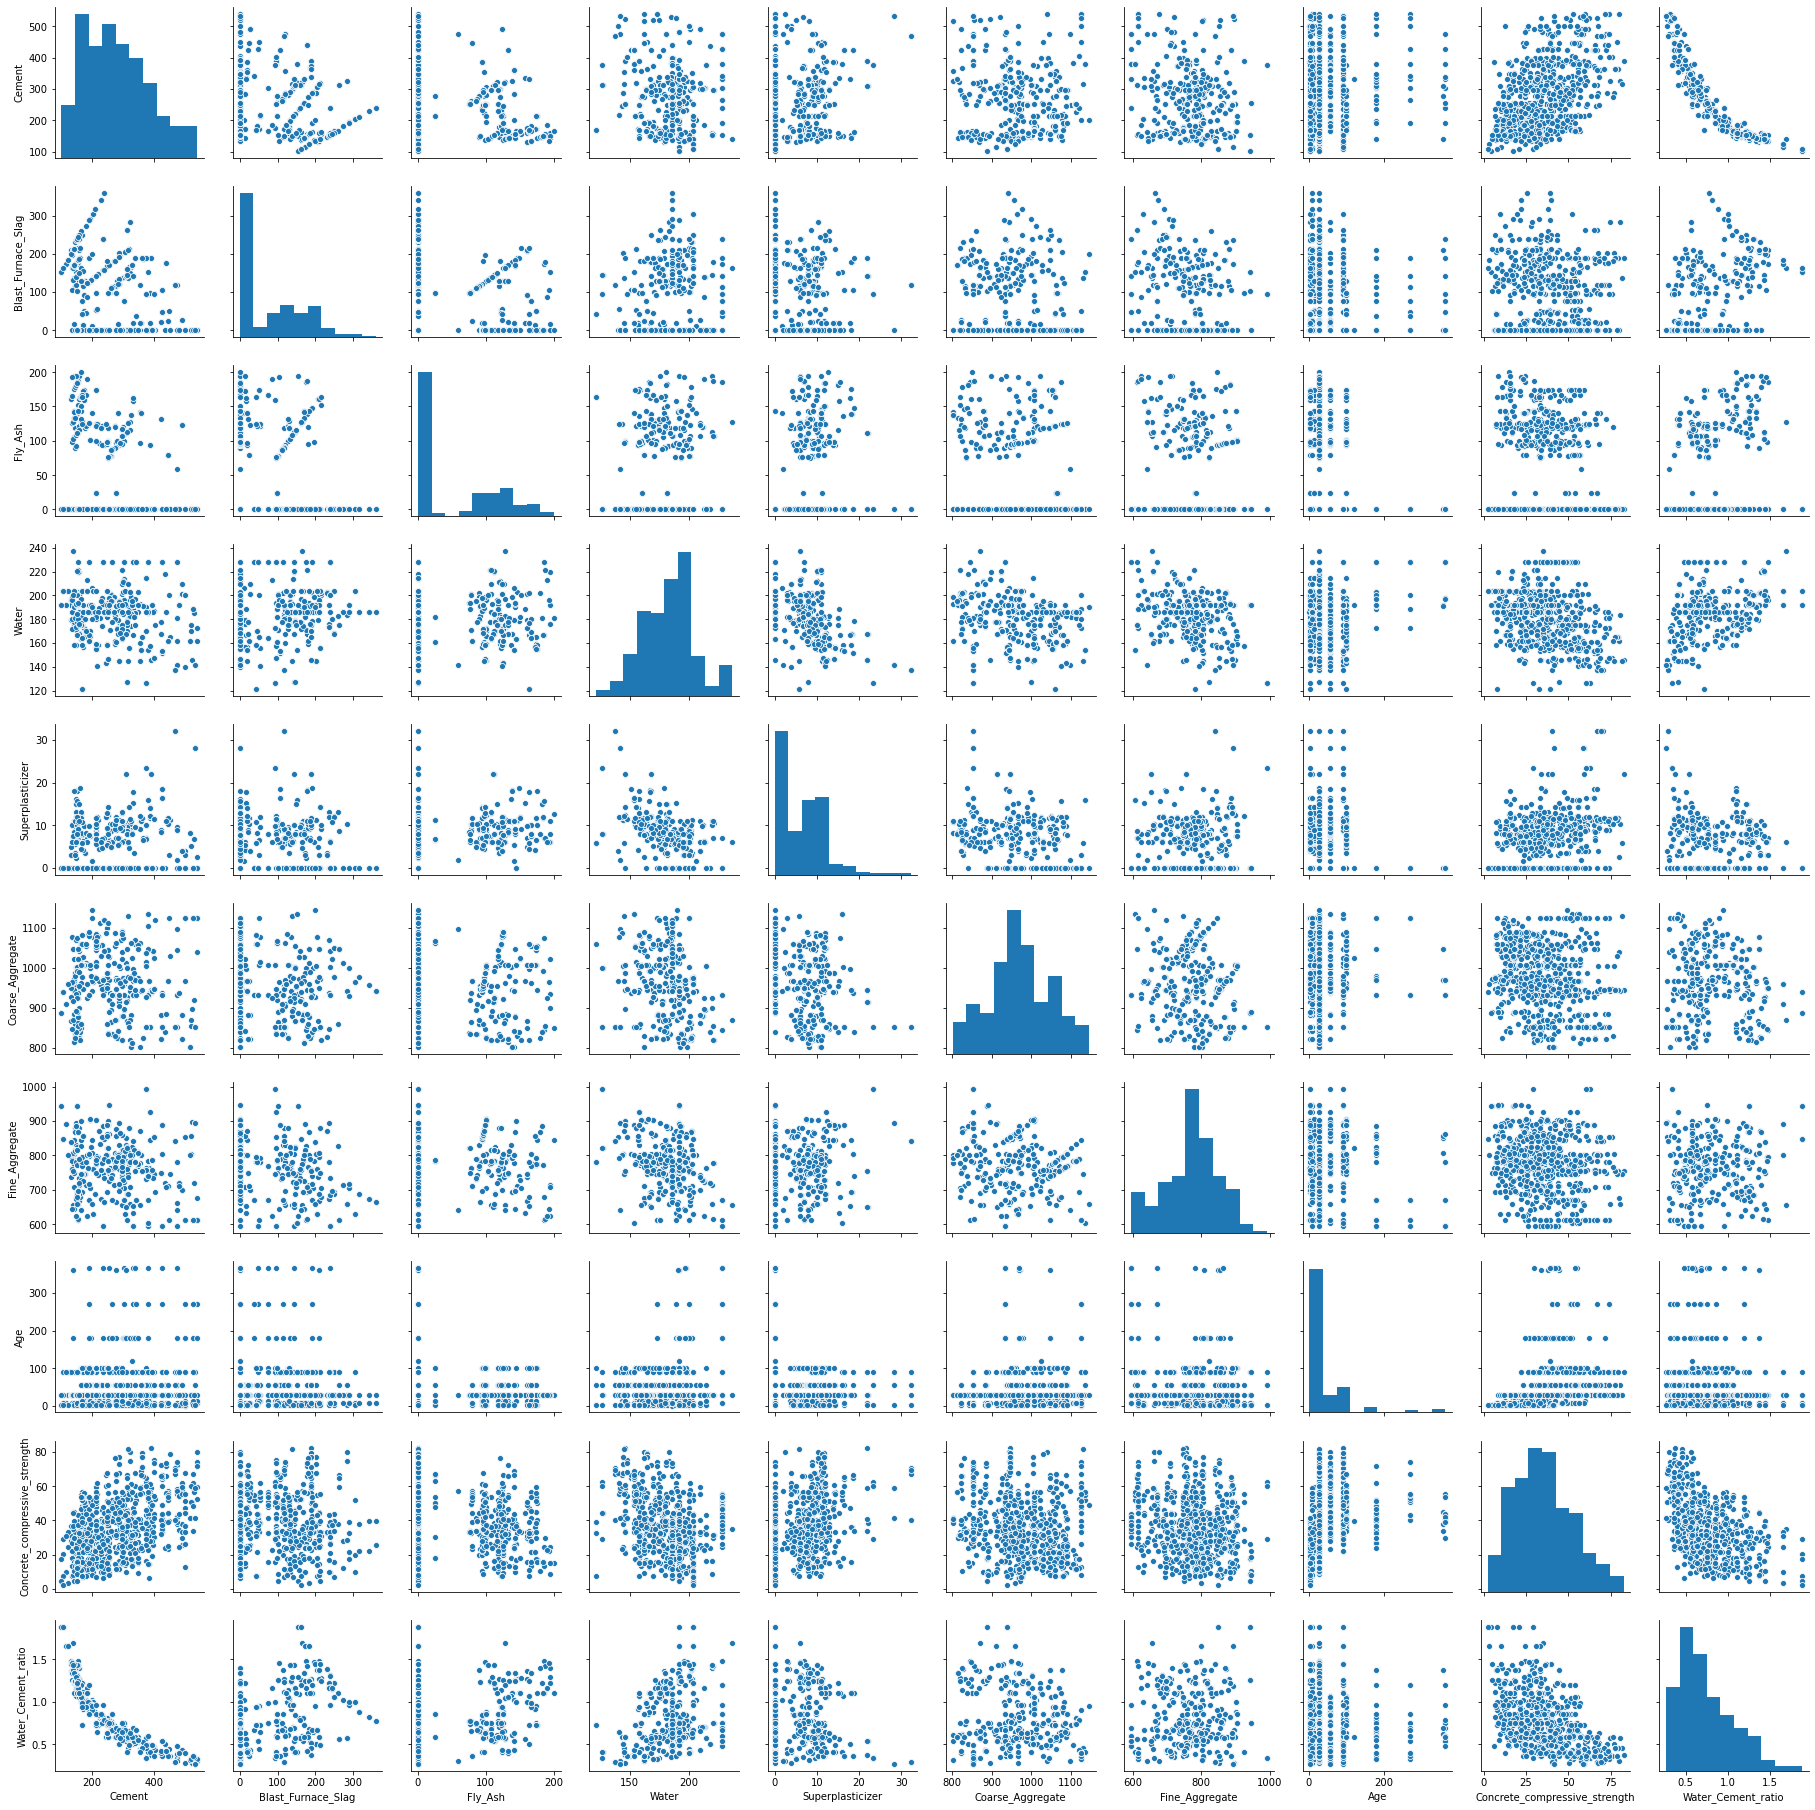

In [ ]:
sns.pairplot(data)

<hr><hr>

### Further Analysis

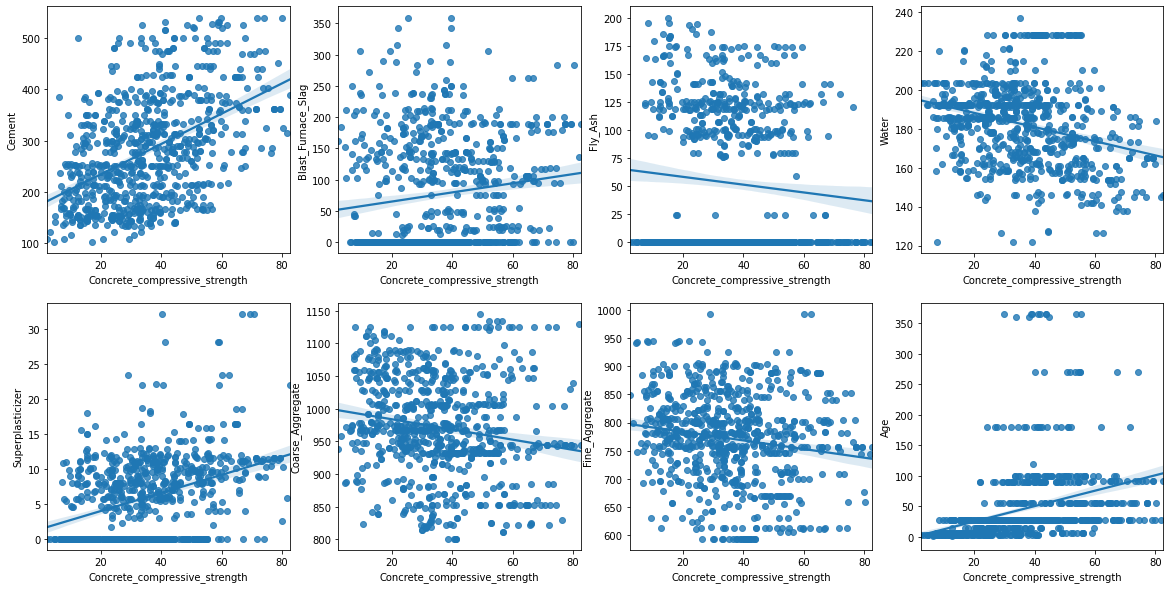

In [ ]:
# Distplot
fig, ax2 = plt.subplots(2,4, figsize=(20, 10))
sns.regplot('Concrete_compressive_strength','Cement',data=data,ax=ax2[0][0])
sns.regplot('Concrete_compressive_strength','Blast_Furnace_Slag',data=data,ax=ax2[0][1])
sns.regplot('Concrete_compressive_strength','Fly_Ash',data=data,ax=ax2[0][2])
sns.regplot('Concrete_compressive_strength','Water',data=data,ax=ax2[0][3])
sns.regplot('Concrete_compressive_strength','Superplasticizer',data=data,ax=ax2[1][0])
sns.regplot('Concrete_compressive_strength','Coarse_Aggregate',data=data,ax=ax2[1][1])
sns.regplot('Concrete_compressive_strength','Fine_Aggregate',data=data,ax=ax2[1][2])
sns.regplot('Concrete_compressive_strength','Age',data=data,ax=ax2[1][3])
#sns.regplot('Concrete_compressive_strength','Water_Cement_ratio',data=data,ax=ax2[0][0])
#sns.regplot('Concrete_compressive_strength','Water_Binder_ratio',data=data,ax=ax2[2][1])


#### Strength attribute : Relationship between dependent and independent attributes
strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

- strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Hence Cement though it has positive relationship with the strength, it is not a very good predictor.
- strength vs slag: There is no particular trend.
- strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
- Other attributes does not give any strong relationship with strength.
Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

### Heatmap to see correlation

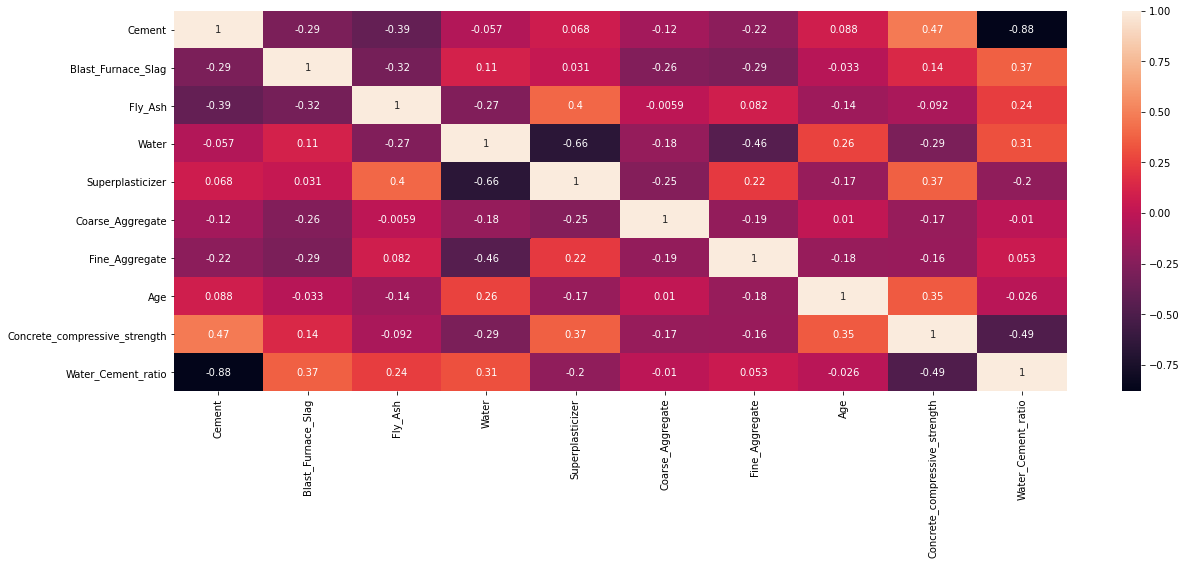

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

### Dropping Water and Cement Columns

In [ ]:
data=data[['Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Water_Cement_ratio',
       'Blast_Furnace_Slag', 'Fly_Ash',
       'Concrete_compressive_strength']]

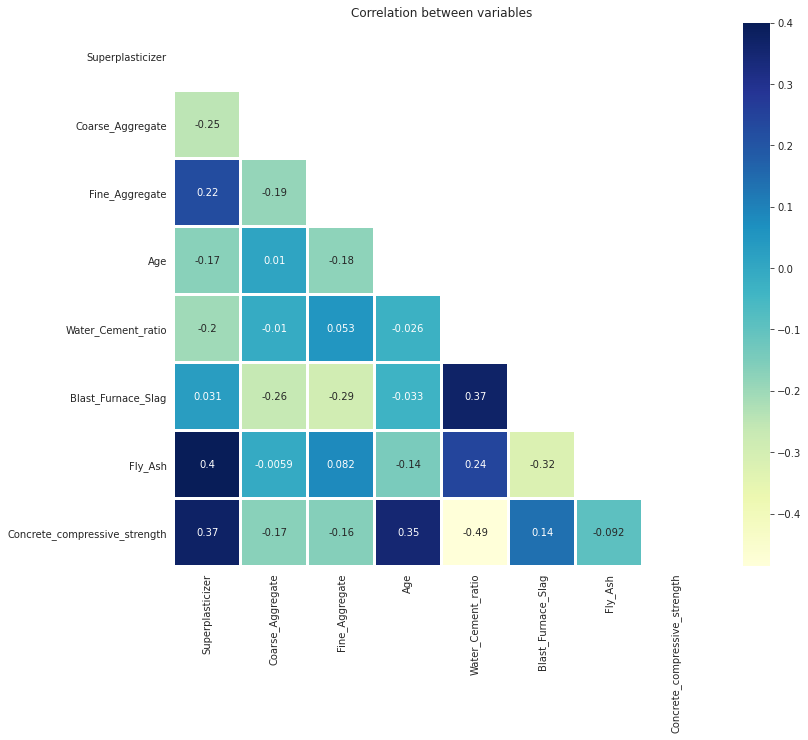

In [ ]:
cor = data.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))

with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="YlGnBu")
plt.title("Correlation between variables")
plt.show()

### Outlier Detection

In [ ]:
outlier_list=[]
for c in data.columns[:-1]:
    Q1=data[c].quantile(q=0.25)
    Q3=data[c].quantile(q=0.75)
    print ("***************************************************************************")
    print('OUTLIER DETECTION FOR',c.upper())
    print ("***************************************************************************")
    
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(data[c]))
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in',c, L_outliers)
    print('Upper outliers in ',c, U_outliers)
    print ("***************************************************************************")
    print('Number of outliers in',c, 'upper : ', data[data[c]>U_outliers][c].count())
    print('Number of outliers in',c,' lower : ', data[data[c]<L_outliers][c].count())
    print('% of Outlier in ',c,' upper: ',round(data[data[c]>U_outliers][c].count()*100/len(data)), '%')
    print('% of Outlier in ',c,' lower: ',round(data[data[c]<L_outliers][c].count()*100/len(data)), '%')
    print ("***************************************************************************")
    print(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)
    outlier_list.extend(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)
    print('\n')

***************************************************************************
OUTLIER DETECTION FOR SUPERPLASTICIZER
***************************************************************************
1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.025
Interquartile range (IQR) is  10.025
Lower outliers in Superplasticizer -15.037500000000001
Upper outliers in  Superplasticizer 25.0625
***************************************************************************
Number of outliers in Superplasticizer upper :  7
Number of outliers in Superplasticizer  lower :  0
% of Outlier in  Superplasticizer  upper:  1.0 %
% of Outlier in  Superplasticizer  lower:  0.0 %
***************************************************************************
Int64Index([119, 290, 334, 505, 600, 676, 708], dtype='int64')


***************************************************************************
OUTLIER DETECTION FOR COARSE_AGGREGATE
***************************************************************************
1st Quart

In [ ]:
data.loc[list(set(outlier_list))]

,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Water_Cement_ratio,Blast_Furnace_Slag,Fly_Ash,Concrete_compressive_strength
129,0.0,938.2,849.0,28,1.879040,162.4,0.0,20.593959
388,0.0,932.0,594.0,365,0.600000,95.0,0.0,43.698299
391,0.0,932.0,594.0,180,0.600000,95.0,0.0,40.759063
393,23.4,852.1,992.6,91,0.337600,93.8,0.0,62.500999
9,0.0,1047.0,806.9,360,1.375358,209.4,0.0,44.698040
...,...,...,...,...,...,...,...,...
625,0.0,1125.0,613.0,270,0.360000,0.0,0.0,67.113594
119,28.2,852.1,893.7,91,0.266893,0.0,0.0,59.198409
121,0.0,932.0,594.0,365,0.685714,142.5,0.0,41.052780
635,0.0,932.0,670.0,180,1.200000,190.0,0.0,46.931942


In [ ]:
data_outlier=data.drop(outlier_list,axis=0).reset_index(drop = True) 

<hr><hr>

### Applying ML Method

In [ ]:
# Input/independent variables
X = data.drop('Concrete_compressive_strength', axis = 1)   # here we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'
y = data['Concrete_compressive_strength'] 

#############################################################################
#X_outlier = data_outlier.drop('Concrete_compressive_strength', axis = 1)
#y_outlier = data_outlier['Concrete_compressive_strength'] 

#################################################################################
#X_reduced = data.drop( ['Concrete_compressive_strength','Coarse_Aggregate','Fine_Aggregate'] , axis=1)
#y_reduced = data['Concrete_compressive_strength'] 

###################################################################################
#X_reduced_water_cement= data.drop( ['Concrete_compressive_strength','Water','Cement'] , axis=1)
#y_reduced_water_cement = data['Concrete_compressive_strength'] 

#######################################################################################
#X_reduced_water_binder = data.drop( ['Concrete_compressive_strength','Fly_Ash','Water','Cement','Blast_Furnace_Slag'] , axis=1)
#y_reduced_water_binder = data['Concrete_compressive_strength'] 

#X_original = data.drop(['Concrete_compressive_strength','Water_Cement_ratio'], axis = 1)   # here we are droping the output feature as this is the target and 'X' is input features, the changes are not 
                                              # made inplace as we have not used 'inplace = True'
#y_original = data['Concrete_compressive_strength'] 

In [ ]:
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#X_train_or, X_test_or, y_train_or, y_test_or = train_test_split(X_original, y_original, test_size = 0.25,random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=2)
#X_train_out, X_test_out, y_train_out, y_test_out= train_test_split(X_outlier, y_outlier, test_size = 0.25,random_state=101)
#X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size = 0.25,random_state=101)
#X_train_wc, X_test_wc, y_train_wc, y_test_wc = train_test_split(X_reduced_water_cement, y_reduced_water_cement, test_size = 0.25,random_state=101)
#X_train_wb, X_test_wb, y_train_wb, y_test_wb = train_test_split(X_reduced_water_binder, y_reduced_water_binder, test_size = 0.2,random_state=42)

## Model

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.stats import pearsonr
warnings.filterwarnings("ignore")
#sns.set(style="darkgrid", color_codes=True) 

target = "Concrete_compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type,plot=False):
    
    print (algorithm)
    print ("***************************************************************************")
    algorithm.fit(dtrainx,dtrainy)
    
    #print(algorithm.get_params(deep=True))
    
    prediction = algorithm.predict(dtestx)
    
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    print ("***************************************************************************")
    
    print ('Performance on training data :', algorithm.score(dtrainx,dtrainy)*100)
    print ('Performance on testing data :', algorithm.score(dtestx,dtesty)*100)
    #print('Accuracy : ',metrics.r2_score(dtesty,prediction)*100)
    print ("***************************************************************************")
    if plot==True:
        sns.jointplot(x=dtesty, y=prediction, stat_func=pearsonr,kind="reg", color="k") 
    
       
    prediction = pd.DataFrame(prediction)
    cross_val = cross_val_score(algorithm,dtrainx,dtrainy,cv=10)#,scoring="neg_mean_squared_error"
    cross_val = cross_val.ravel()
    print ("CROSS VALIDATION SCORE")
    print ("************************")
    print ("cv-mean :",cross_val.mean()*100)
    print ("cv-std  :",cross_val.std()*100)
    #print ("cv-max  :",cross_val.max()*100)
    #print ("cv-min  :",cross_val.min()*100)
    
    if plot==True:
        plt.figure(figsize=(20,22))
        plt.subplot(211)

        testy = dtesty.reset_index()["Concrete_compressive_strength"]

        ax = testy.plot(label="originals",figsize=(20,9),linewidth=2)
        ax = prediction[0].plot(label = "predictions",figsize=(20,9),linewidth=2)
      #  plt.axhline(testy.mean(),color = "r",linestyle="dashed",label=("original_mean:",testy.mean()))
      #  plt.axhline(prediction[0].mean(),color="b",linestyle = "dashed",label=("prediction_mean:",prediction[0].mean()))
        plt.legend(loc="best")
        plt.title("ORIGINALS VS PREDICTIONS")
        plt.xlabel("index")
        plt.ylabel("values")
        ax.set_facecolor("k")

        plt.subplot(212)

        if of_type == "coef":
            coef = pd.DataFrame(algorithm.coef_.ravel())
            coef["feat"] = dtrainx.columns
            ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                              linewidth=2,edgecolor="k"*coef["feat"].nunique())
            ax1.set_facecolor("lightgrey")
            ax1.axhline(0,color="k",linewidth=2)
            plt.ylabel("coefficients")
            plt.xlabel("features")
            plt.title('FEATURE IMPORTANCES')

        elif of_type == "feat":
            coef = pd.DataFrame(algorithm.feature_importances_)
            coef["feat"] = dtrainx.columns
            ax2 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
                              linewidth=2,edgecolor="k"*coef["feat"].nunique())
            ax2.set_facecolor("lightgrey")
            ax2.axhline(0,color="k",linewidth=2)
            plt.ylabel("coefficients")
            plt.xlabel("features")
            plt.title('FEATURE IMPORTANCES')

### XGBoost Regressor

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor(random_state=2)
#model(xgr,X_train_or,y_train_or,X_test_or,y_test_or,"feat")
model(xgr,X_train,y_train,X_test,y_test,"feat")
#model(xgr,X_train_out,y_train_out,X_test_out,y_test_out,"feat")
#model(xgr,X_train_red,y_train_red,X_test_red,y_test_red,"feat")
#model(xgr,X_train_wc,y_train_wc,X_test_wc,y_test_wc,"feat")
#model(xgr,X_train_wb,y_train_wb,X_test_wb,y_test_wb,"feat")

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=2, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.293225914677778
***************************************************************************
Performance on training data : 99.60602815057365
Performance on testing data : 93.62626127437285
***************************************************************************
CROSS VALID

XGBRegressor(base_score=None, booster=None, colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0.1, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=-1, num_parallel_tree=None,
             random_state=2, reg_alpha=0.005, reg_lambda=None,
             scale_pos_weight=None, subsample=0.7, tree_method=None,
             validate_parameters=None, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 3.4502786463067987
***************************************************************************
Performance on training data : 98.3023947065428
Performance on testing data : 95.88343371243803
***************************************************************************
CROSS VALIDATION SCOR

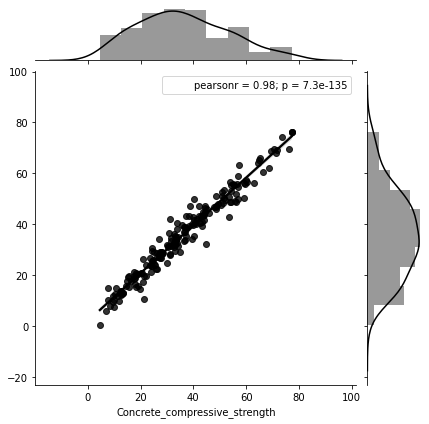

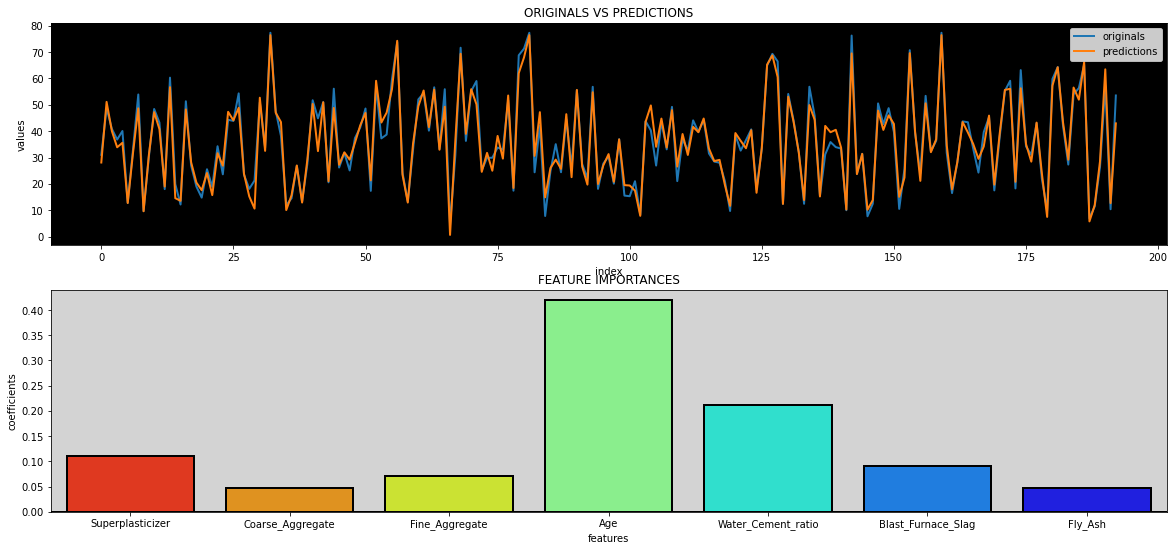

In [ ]:
xgr_1=XGBRegressor(random_state=2,learning_rate = 0.2,
                max_depth = 2, n_estimators = 800,n_jobs=-1,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)
model(xgr_1,X_train,y_train,X_test,y_test,"feat",True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid={'n_estimators' : [500,800,1000],
                                                    'max_depth' : [1,2, 3,5,7,9,10,11,15],
                                                    'learning_rate' :[ 0.0001, 0.001, 0.01, 0.1, 0.15, 0.2, 0.8, 1.0],
                                                     }
# Create a base model
xgbr = XGBRegressor(random_state = 2,reg_alpha=0.005,gamma=0.1,subsample=0.7,colsample_bytree=0.9, colsample_bylevel=0.9, colsample_bynode=0.9)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgbr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   50.8s finished


In [ ]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 1000}

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=0.9, colsample_bytree=0.9, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=2,
             reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)
***************************************************************************
ROOT MEAN SQUARED ERROR : 3.4521891604676678
***************************************************************************
Performance on training data : 98.50802800350095
Performance on testing data : 95.8788735383423
***************************************************************************
CROSS VALIDATION SCORE
************************
cv

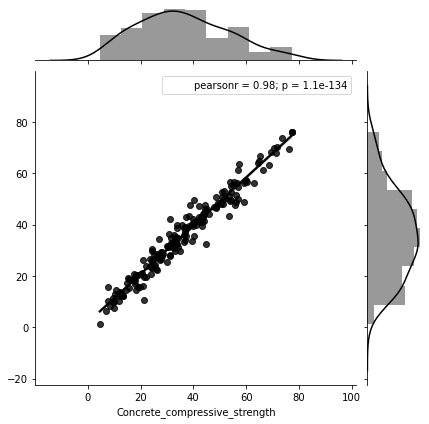

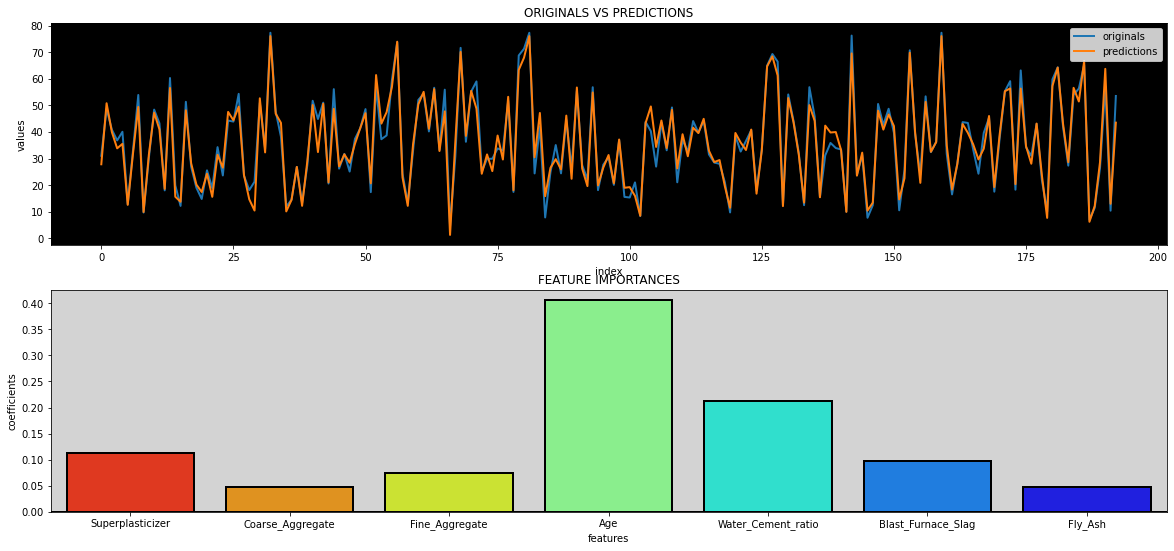

In [ ]:
best_grid = grid_search.best_estimator_
model(best_grid,X_train,y_train,X_test,y_test,"feat",True)

### Bagging Regressor

In [ ]:
from sklearn.ensemble import BaggingRegressor
regr = BaggingRegressor(base_estimator=xgr_1,
                         n_estimators=400, random_state=2,n_jobs=-1).fit(X_train, y_train)
pred=regr.predict(X_test)
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred)))

Root Mean Squared Error is:  3.681606562241377


In [ ]:
regr_1 = BaggingRegressor(base_estimator=best_grid,
                         n_estimators=400, random_state=2,n_jobs=-1).fit(X_train, y_train)
pred=regr_1.predict(X_test)
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred)))

Root Mean Squared Error is:  3.6408372479763034


<hr><hr>

### Predicting Output

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
test_data.columns=['Cement',
       'Blast_Furnace_Slag',
       'Fly_Ash',
       'Water',
       'Superplasticizer',
       'Coarse_Aggregate',
       'Fine_Aggregate', 'Age']

test_data['Water_Cement_ratio']=test_data['Water']/test_data['Cement']
#test_data['Water_Binder_ratio']=test_data['Water']/(test_data['Cement']+test_data['Blast_Furnace_Slag']+test_data['Fly_Ash'])

In [ ]:
test_data=test_data[['Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age',
       'Water_Cement_ratio', 'Blast_Furnace_Slag', 'Fly_Ash']]

In [ ]:
target = regr_1.predict(test_data)
#target = model_nn.predict(sc.transform(test_data))

In [ ]:
res = pd.DataFrame(target) #target is nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("final_predictions.csv")      # the csv file will be saved locally on the same location where this notebook is located.

<hr><hr><hr>

### Other methods that didn't perform well

In [ ]:
### Gradient Boosting Regressor
from sklearn.ensemble import  GradientBoostingRegressor
gbr = GradientBoostingRegressor()
model(gbr,X_train,y_train,X_test,y_test,"feat")

GradientBoostingRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 5.008010927751834
***************************************************************************
Performance on training data : 94.36619580223245
Performance on testing data : 91.32724040466007
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 87.65802134745945
cv-std  : 4.093712673647703


In [ ]:
### Random Forest Regressor
from sklearn.ensemble import  RandomForestRegressor
rf = RandomForestRegressor()
model(rf,X_train,y_train,X_test,y_test,"feat")

RandomForestRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.874756726723238
***************************************************************************
Performance on training data : 98.13379852670631
Performance on testing data : 91.78263331719162
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 87.04490886514857
cv-std  : 5.241244488730491


In [ ]:
### Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,X_train,y_train,X_test,y_test,"feat")

DecisionTreeRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 6.515458929793951
***************************************************************************
Performance on training data : 99.6598304897822
Performance on testing data : 85.32031300477297
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 81.89116288257556
cv-std  : 8.13810246840993


In [ ]:
### Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
model(etr,X_train,y_train,X_test,y_test,"feat")

ExtraTreesRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 4.524873798292467
***************************************************************************
Performance on training data : 99.6598304897822
Performance on testing data : 92.91989474138155
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 87.62836483364899
cv-std  : 6.1035857159278795


In [ ]:
### AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
model(adb,X_train,y_train,X_test,y_test,"feat")

AdaBoostRegressor()
***************************************************************************
ROOT MEAN SQUARED ERROR : 7.646947685812181
***************************************************************************
Performance on training data : 82.67558462666786
Performance on testing data : 79.77898223963979
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 76.0088158127106
cv-std  : 5.65938764653016


In [ ]:
### Ridge Regression
from sklearn.linear_model import  Ridge
ridge = Ridge()
model(ridge,X_train,y_train,X_test,y_test,"coef")

Ridge()
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.164902780121718
***************************************************************************
Performance on training data : 55.740751796115376
Performance on testing data : 64.26998233000965
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 53.026510242147694
cv-std  : 9.940565116690118


In [ ]:
### Lasso Regression
from sklearn.linear_model import Lasso
ls = Lasso()
model(ls,X_train,y_train,X_test,y_test,"coef")

Lasso()
***************************************************************************
ROOT MEAN SQUARED ERROR : 11.966225929798396
***************************************************************************
Performance on training data : 47.10175077175207
Performance on testing data : 50.48449997369019
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 44.47929908774865
cv-std  : 9.043292174273391


In [ ]:
### Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test,"coef")

LinearRegression()
***************************************************************************
ROOT MEAN SQUARED ERROR : 10.143250910613844
***************************************************************************
Performance on training data : 55.76703971754856
Performance on testing data : 64.42203449733246
***************************************************************************
CROSS VALIDATION SCORE
************************
cv-mean : 53.00933448965844
cv-std  : 10.042259235138685


In [ ]:
### Neural Network
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Building ANN As a Regressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend

#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# Initialising the ANN
model_nn = Sequential()

# Adding the input layer and the first hidden layer
model_nn.add(Dense(512, activation = 'relu', input_dim = 7))
model_nn.add(BatchNormalization())
# Adding the second hidden layer
model_nn.add(Dense(units = 256, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the third hidden layer
model_nn.add(Dense(units = 128, activation = 'relu'))
model_nn.add(BatchNormalization())
model_nn.add(Dense(units = 32, activation = 'relu'))
model_nn.add(BatchNormalization())
# Adding the output layer
model_nn.add(Dense(units = 1))

# Optimize , Compile And Train The Model 
opt =keras.optimizers.Adam(lr=0.0015)
#print(model_nn.summary())
model_nn.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])

history = model_nn.fit(sc.fit_transform(X_train),y_train,epochs = 200 ,batch_size=32,validation_data=(sc.transform(X_test), y_test))

In [ ]:
import tensorflow as tf
checkpoint_filepath ='best.hdf5'# 'C:/Users/admin\/Downloads/Study/Dphi/Datathon 4'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_rmse',
    mode='min',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history=model_nn.fit(sc.fit_transform(X_train),y_train,epochs = 500 ,batch_size=32,validation_data=(sc.transform(X_test), y_test), callbacks=[model_checkpoint_callback])

# The model weights (that are considered the best) are loaded into the model.
model_nn.load_weights(checkpoint_filepath)

Epoch 1/500
19/19 [==============================] - 0s 21ms/step - loss: 1446.6202 - rmse: 35.4475 - val_loss: 1573.5015 - val_rmse: 36.2008
Epoch 2/500
19/19 [==============================] - 0s 7ms/step - loss: 1369.7306 - rmse: 35.1712 - val_loss: 1559.9540 - val_rmse: 36.3410
Epoch 3/500
19/19 [==============================] - 0s 6ms/step - loss: 1317.0396 - rmse: 34.8262 - val_loss: 1541.0643 - val_rmse: 36.3253
Epoch 4/500
19/19 [==============================] - 0s 6ms/step - loss: 1271.3938 - rmse: 34.4117 - val_loss: 1522.7079 - val_rmse: 36.4527
Epoch 5/500
19/19 [==============================] - 0s 6ms/step - loss: 1220.1991 - rmse: 33.9259 - val_loss: 1481.5537 - val_rmse: 36.1510
Epoch 6/500
19/19 [==============================] - 0s 8ms/step - loss: 1172.0770 - rmse: 33.3661 - val_loss: 1441.0273 - val_rmse: 35.7041
Epoch 7/500
19/19 [==============================] - 0s 6ms/step - loss: 1128.1516 - rmse: 32.7540 - val_loss: 1370.3181 - val_rmse: 34.7120
Epoch 8/500


19/19 [==============================] - 0s 5ms/step - loss: 31.5297 - rmse: 4.1920 - val_loss: 23.9737 - val_rmse: 3.8660
Epoch 61/500
19/19 [==============================] - 0s 4ms/step - loss: 37.1469 - rmse: 4.6771 - val_loss: 31.4688 - val_rmse: 4.1101
Epoch 62/500
19/19 [==============================] - 0s 6ms/step - loss: 35.9648 - rmse: 4.5806 - val_loss: 37.8023 - val_rmse: 4.4147
Epoch 63/500
19/19 [==============================] - 0s 6ms/step - loss: 33.6551 - rmse: 4.4493 - val_loss: 27.9293 - val_rmse: 4.2114
Epoch 64/500
19/19 [==============================] - 0s 6ms/step - loss: 31.7637 - rmse: 4.4282 - val_loss: 23.5315 - val_rmse: 3.7670
Epoch 65/500
19/19 [==============================] - 0s 3ms/step - loss: 31.3055 - rmse: 4.2380 - val_loss: 32.2325 - val_rmse: 4.1044
Epoch 66/500
19/19 [==============================] - 0s 8ms/step - loss: 30.1216 - rmse: 4.1334 - val_loss: 21.7941 - val_rmse: 3.4895
Epoch 67/500
19/19 [==============================] - 0s 5ms/

19/19 [==============================] - 0s 6ms/step - loss: 29.1203 - rmse: 4.1754 - val_loss: 24.7153 - val_rmse: 3.7989
Epoch 121/500
19/19 [==============================] - 0s 6ms/step - loss: 23.8723 - rmse: 3.7500 - val_loss: 24.2184 - val_rmse: 3.6421
Epoch 122/500
19/19 [==============================] - 0s 6ms/step - loss: 32.7832 - rmse: 4.4366 - val_loss: 24.3747 - val_rmse: 3.5806
Epoch 123/500
19/19 [==============================] - 0s 4ms/step - loss: 32.5973 - rmse: 4.4880 - val_loss: 29.6244 - val_rmse: 3.9268
Epoch 124/500
19/19 [==============================] - 0s 5ms/step - loss: 26.3374 - rmse: 3.9488 - val_loss: 27.0082 - val_rmse: 3.9457
Epoch 125/500
19/19 [==============================] - 0s 4ms/step - loss: 23.9604 - rmse: 3.7007 - val_loss: 27.2908 - val_rmse: 3.7855
Epoch 126/500
19/19 [==============================] - 0s 4ms/step - loss: 30.0931 - rmse: 4.2050 - val_loss: 25.9478 - val_rmse: 3.7649
Epoch 127/500
19/19 [==============================] - 

Epoch 180/500
19/19 [==============================] - 0s 5ms/step - loss: 24.6611 - rmse: 3.8687 - val_loss: 26.1124 - val_rmse: 3.8394
Epoch 181/500
19/19 [==============================] - 0s 5ms/step - loss: 19.9245 - rmse: 3.4790 - val_loss: 21.5354 - val_rmse: 3.4250
Epoch 182/500
19/19 [==============================] - 0s 6ms/step - loss: 27.7749 - rmse: 3.9440 - val_loss: 28.4228 - val_rmse: 3.9988
Epoch 183/500
19/19 [==============================] - 0s 5ms/step - loss: 26.0136 - rmse: 4.0038 - val_loss: 23.0982 - val_rmse: 3.6889
Epoch 184/500
19/19 [==============================] - 0s 5ms/step - loss: 24.2109 - rmse: 3.7511 - val_loss: 22.5633 - val_rmse: 3.5346
Epoch 185/500
19/19 [==============================] - 0s 4ms/step - loss: 34.2513 - rmse: 4.5035 - val_loss: 27.2441 - val_rmse: 4.0326
Epoch 186/500
19/19 [==============================] - 0s 5ms/step - loss: 23.9212 - rmse: 3.6183 - val_loss: 26.3612 - val_rmse: 3.8187
Epoch 187/500
19/19 [====================

Epoch 240/500
19/19 [==============================] - 0s 10ms/step - loss: 27.1053 - rmse: 3.9782 - val_loss: 26.7740 - val_rmse: 4.0522
Epoch 241/500
19/19 [==============================] - 0s 5ms/step - loss: 26.2598 - rmse: 3.9197 - val_loss: 25.0589 - val_rmse: 3.8682
Epoch 242/500
19/19 [==============================] - 0s 5ms/step - loss: 34.9754 - rmse: 4.5590 - val_loss: 28.0816 - val_rmse: 4.2216
Epoch 243/500
19/19 [==============================] - 0s 4ms/step - loss: 26.0982 - rmse: 3.8315 - val_loss: 25.0246 - val_rmse: 3.9726
Epoch 244/500
19/19 [==============================] - 0s 7ms/step - loss: 30.8060 - rmse: 4.3303 - val_loss: 25.4307 - val_rmse: 3.9329
Epoch 245/500
19/19 [==============================] - 0s 5ms/step - loss: 24.6128 - rmse: 3.8410 - val_loss: 23.9111 - val_rmse: 3.7434
Epoch 246/500
19/19 [==============================] - 0s 5ms/step - loss: 21.1314 - rmse: 3.5151 - val_loss: 22.4331 - val_rmse: 3.6327
Epoch 247/500
19/19 [===================

Epoch 300/500
19/19 [==============================] - 0s 6ms/step - loss: 25.7824 - rmse: 3.8247 - val_loss: 21.3732 - val_rmse: 3.4394
Epoch 301/500
19/19 [==============================] - 0s 5ms/step - loss: 17.9783 - rmse: 3.2438 - val_loss: 20.5776 - val_rmse: 3.3972
Epoch 302/500
19/19 [==============================] - 0s 5ms/step - loss: 26.8115 - rmse: 3.9115 - val_loss: 20.0590 - val_rmse: 3.4026
Epoch 303/500
19/19 [==============================] - 0s 3ms/step - loss: 26.4434 - rmse: 4.0131 - val_loss: 22.4412 - val_rmse: 3.5373
Epoch 304/500
19/19 [==============================] - 0s 4ms/step - loss: 27.3386 - rmse: 4.0035 - val_loss: 24.1850 - val_rmse: 3.8028
Epoch 305/500
19/19 [==============================] - 0s 5ms/step - loss: 24.6357 - rmse: 3.7249 - val_loss: 24.7766 - val_rmse: 3.6309
Epoch 306/500
19/19 [==============================] - 0s 6ms/step - loss: 21.7201 - rmse: 3.5785 - val_loss: 20.0293 - val_rmse: 3.3519
Epoch 307/500
19/19 [====================

Epoch 360/500
19/19 [==============================] - 0s 6ms/step - loss: 24.2894 - rmse: 3.5127 - val_loss: 16.3960 - val_rmse: 2.8659
Epoch 361/500
19/19 [==============================] - 0s 4ms/step - loss: 24.0577 - rmse: 3.7181 - val_loss: 19.0571 - val_rmse: 3.1859
Epoch 362/500
19/19 [==============================] - 0s 5ms/step - loss: 21.6714 - rmse: 3.5101 - val_loss: 17.9789 - val_rmse: 2.9949
Epoch 363/500
19/19 [==============================] - 0s 5ms/step - loss: 18.2704 - rmse: 3.2666 - val_loss: 18.3424 - val_rmse: 3.0446
Epoch 364/500
19/19 [==============================] - 0s 5ms/step - loss: 20.8348 - rmse: 3.4885 - val_loss: 16.7679 - val_rmse: 2.9912
Epoch 365/500
19/19 [==============================] - 0s 5ms/step - loss: 20.7465 - rmse: 3.5436 - val_loss: 19.2193 - val_rmse: 3.0612
Epoch 366/500
19/19 [==============================] - 0s 5ms/step - loss: 20.6162 - rmse: 3.4514 - val_loss: 19.5739 - val_rmse: 3.0919
Epoch 367/500
19/19 [====================

Epoch 420/500
19/19 [==============================] - 0s 4ms/step - loss: 23.8491 - rmse: 3.7644 - val_loss: 22.6800 - val_rmse: 3.5069
Epoch 421/500
19/19 [==============================] - 0s 4ms/step - loss: 24.1277 - rmse: 3.8768 - val_loss: 24.8749 - val_rmse: 3.5823
Epoch 422/500
19/19 [==============================] - 0s 5ms/step - loss: 25.2366 - rmse: 3.7815 - val_loss: 23.0114 - val_rmse: 3.4945
Epoch 423/500
19/19 [==============================] - 0s 5ms/step - loss: 26.7446 - rmse: 3.4967 - val_loss: 21.1401 - val_rmse: 3.3159
Epoch 424/500
19/19 [==============================] - 0s 5ms/step - loss: 20.4084 - rmse: 3.4925 - val_loss: 25.1953 - val_rmse: 3.6071
Epoch 425/500
19/19 [==============================] - 0s 4ms/step - loss: 19.2511 - rmse: 3.3593 - val_loss: 21.8531 - val_rmse: 3.4082
Epoch 426/500
19/19 [==============================] - 0s 5ms/step - loss: 20.4860 - rmse: 3.4587 - val_loss: 19.7521 - val_rmse: 3.1347
Epoch 427/500
19/19 [====================

Epoch 480/500
19/19 [==============================] - 0s 4ms/step - loss: 28.3451 - rmse: 4.0495 - val_loss: 29.5789 - val_rmse: 4.0745
Epoch 481/500
19/19 [==============================] - 0s 4ms/step - loss: 26.5255 - rmse: 3.9720 - val_loss: 43.4796 - val_rmse: 4.7854
Epoch 482/500
19/19 [==============================] - 0s 4ms/step - loss: 26.3422 - rmse: 3.9161 - val_loss: 34.6319 - val_rmse: 4.4670
Epoch 483/500
19/19 [==============================] - 0s 5ms/step - loss: 25.4562 - rmse: 3.8669 - val_loss: 32.8460 - val_rmse: 4.2698
Epoch 484/500
19/19 [==============================] - 0s 4ms/step - loss: 29.1401 - rmse: 4.2648 - val_loss: 31.8503 - val_rmse: 4.2956
Epoch 485/500
19/19 [==============================] - 0s 4ms/step - loss: 26.0875 - rmse: 3.9566 - val_loss: 29.2903 - val_rmse: 4.1246
Epoch 486/500
19/19 [==============================] - 0s 5ms/step - loss: 27.0224 - rmse: 4.0756 - val_loss: 23.9789 - val_rmse: 3.6451
Epoch 487/500
19/19 [====================

Root Mean Squared Error is:  4.034781484530675


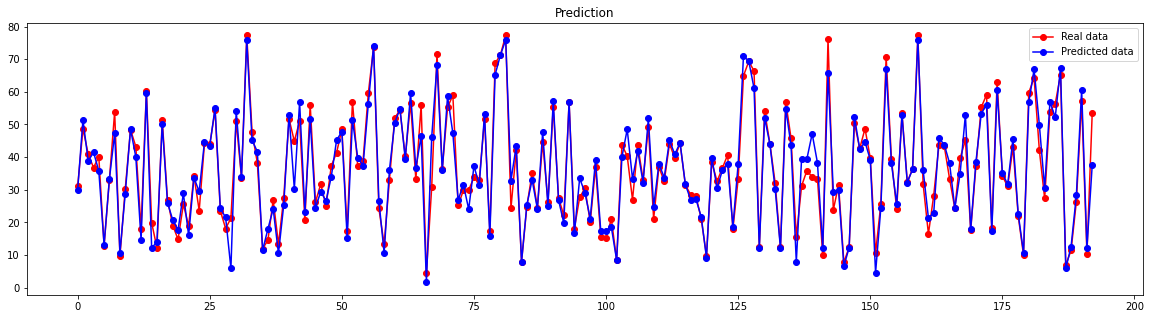

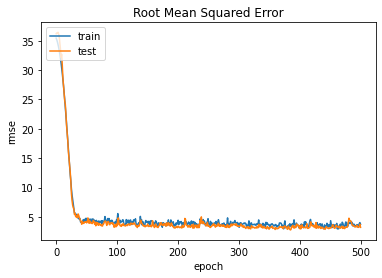

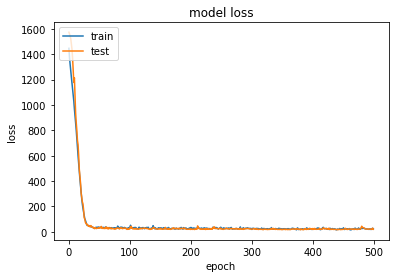

In [ ]:
# Predicting and Finding R Squared Score
y_predict = model_nn.predict(sc.transform(X_test))
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, y_predict))) 

plt.figure(figsize=(20,5))
plt.plot(list(y_test) ,color = 'red', label = 'Real data',marker='o')
plt.plot(y_predict, color = 'blue', label = 'Predicted data',marker='o')
plt.title('Prediction')
plt.legend()
plt.show()

# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()